### The Problem with having Multicollinearity

Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. For example, let’s assume that in the following linear equation:

Y = W0+W1*X1+W2*X2

Coefficient W1 is the increase in Y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2 and we would not be able to see their individual effect on Y.


What causes Multicollinearity?

Multicollinearity could occur due to the following problems:

    Multicollinearity could exist because of the problems in the dataset at the time of creation. These problems could be because of poorly designed experiments, highly observational data, or the inability to manipulate the data:
        For example, determining the electricity consumption of a household from the household income and the number of electrical appliances. Here, we know that the number of electrical appliances in a household will increase with household income. However, this cannot be removed from the dataset

    Multicollinearity could also occur when new variables are created which are dependent on other variables:
        For example, creating a variable for BMI from the height and weight variables would include redundant information in the model

    Including identical variables in the dataset:
        For example, including variables for temperature in Fahrenheit and temperature in Celsius

    Inaccurate use of dummy variables can also cause a multicollinearity problem. This is called the Dummy variable trap:
        For example, in a dataset containing the status of marriage variable with two unique values: ‘married’, ’single’. Creating dummy variables for both of them would include redundant information. We can make do with only one variable containing 0/1 for ‘married’/’single’ status.

    Insufficient data in some cases can also cause multicollinearity problems


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Data/housing.csv")

In [3]:
#df["Close"]=df["Close"].apply(lambda x:float(x.replace(",","")))
#df["Volume"]=df["Volume"].apply(lambda x:float(x.replace(",","")))

In [4]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


Multicollinearity can be detected via various methods. In this article, we will focus on the most common one – VIF (Variable Inflation Factors).

R^2 value is determined to find out how well an independent variable is described by the other independent variables. A high value of R^2 means that the variable is highly correlated with the other variables. This is captured by the VIF which is denoted below:
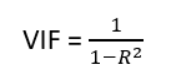

So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(df):
    d={}
    for i in range(df.shape[1]):
        d[df.columns[i]]=variance_inflation_factor(df.values,i)
    return d

In [6]:

X=df
get_vif(X)

{'RM': 118.38808961936905,
 'LSTAT': 8.209014631871819,
 'PTRATIO': 64.57550325995534,
 'MEDV': 28.218939396203833}


    VIF starts at 1 and has no upper limit
    VIF = 1, no correlation between the independent variable and the other variables
    VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others


### Fixing Multicollinearity

Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:

In [8]:
X = df.drop(columns=["PTRATIO"])
get_vif(X)

{'RM': 44.91197666603433,
 'LSTAT': 7.023142747041569,
 'MEDV': 25.520959536322515}